In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

# Regression

## Simple Regression

Outcome = (Model) + error

i)total_sum_of_squares(ss_t) =  it is the total amount of differences present when the most basic model(mean) is applied to the data.


ii)residual_sum_of_squares(ss_r) = This value represents the degree of inaccuracy when the best model is fitted to the data.


iii)model sum of squares(ss_m) = ss_t - ss_r

R_squared = ss_m/ss_t

## F and the t-statistic is based on the ratio of explained variance against unexplained variance or error.

#### In  regression,  the  degrees  of  freedom  are N − p −  1,  where N  is  the  total sample  size  and p  is  the  number  of  predictors.  In  simple  regression  when  we  have  only one  predictor,  so  this  gives N −  2. 

In [309]:
data = pd.read_csv('Album.csv')
data.head()

,adverts,sales
0,10.256,330
1,985.685,120
2,1445.563,360
3,1188.193,270
4,574.513,220


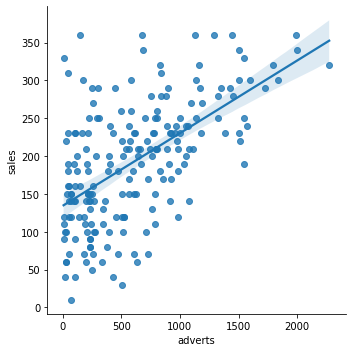

In [310]:
_ = sns.lmplot(x='adverts', y='sales', data=data)

In [311]:
model = sm.OLS.from_formula('sales ~ adverts',data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.94e-19
Time:                        07:34:20   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.0

#### For  these  data, F  is  99.59,  which  is  significant  at p<  .001  (because  the  value labelled p-value is less than .001). This result tells us that there is less than a 0.1% chance that  an F-ratio  this  large  would  happen  if  the  null  hypothesis  were  true.  Therefore,  we can conclude that our regression model results in significantly better prediction of album sales than if we used the mean value of album sales.

#### R^2, which tells us how much variance is explained by the model compared to how much variance there is to explain in the first place. It is the proportion of variance in the outcome variable that is shared by the predictor variable

#### F, which tells us how much variability the model can explain relative to how much it can’t explain (i.e., it’s the ratio of how good the model is compared to how bad it is).

## Multiple Regression

outcome = (model) + error

#### Akaike information criterion (AIC)

AIC = n\*ln(SSE/n) + 2*k


where,  n  is  the  number  of  cases  in  the  model,  ln  is  the  natural  log,  SSE  is  the  sum  of square errors for the model, and k is the number of predictor variables.

The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative quality of statistical models for a given set of data.Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 

In [312]:
pubs = pd.read_csv('pubs.csv')

In [313]:
pubs

,pubs,mortality
0,10,1000
1,20,2000
2,30,3000
3,40,4000
4,50,5000
5,60,6000
6,70,7000
7,500,10000


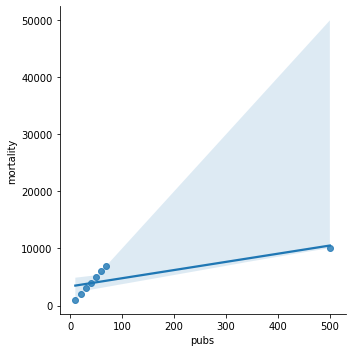

In [314]:
_ = sns.lmplot(x='pubs', y='mortality', data=pubs)

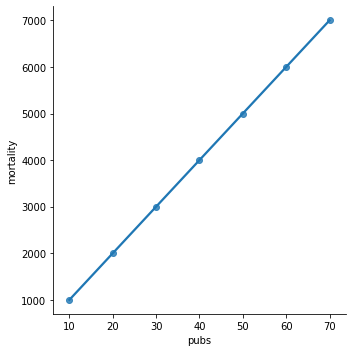

In [315]:
_ = sns.lmplot(x='pubs', y='mortality', data=pubs[:7])

In [316]:
model = sm.OLS.from_formula( "mortality~pubs",data=pubs)
res=model.fit()
res.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0157
Time:                        07:34:22   Log-Likelihood:                -70.446
No. Observations:                   8   AIC:                             144.9
Df Residuals:                       6   BIC:                             145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3351.9553    781.236      4.291      0.005    1440.341    5263.570
pubs          14.3389      4.301      3.334      0.016       3.816      24.862
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.387
Skew:                           0.132   Prob(JB):                        0.824
Kurtosis:                       1.955   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
model = sm.OLS.from_formula( "mortality~pubs",data=pubs[:7])
res=model.fit()
res.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.692e+32
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           5.09e-80
Time:                        07:34:22   Log-Likelihood:                 190.96
No. Observations:                   7   AIC:                            -377.9
Df Residuals:                       5   BIC:                            -378.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.547e-13   3.44e-13     -1.323      0.243   -1.34e-12    4.29e-13
pubs         100.0000   7.69e-15    1.3e+16      0.000     100.000     100.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.250
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.169
Skew:                          -0.289   Prob(JB):                        0.557
Kurtosis:                       1.083   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  b1  in simple regression is same as Pearson’s correlation coefficient

#### With simple linear regression (i.e., only 1 covariate), the slope b1 is the same as Pearson's r if both variables were standardized first. 
https://stats.stackexchange.com/questions/22718/what-is-the-difference-between-linear-regression-on-y-with-x-and-x-with-y/22721#22721

In [318]:
pubs.describe()

,pubs,mortality
count,8.000000,8.000000
mean,97.500000,4750.000000
std,163.859696,2915.475947
min,10.000000,1000.000000
25%,27.500000,2750.000000
50%,45.000000,4500.000000
75%,62.500000,6250.000000
max,500.000000,10000.000000


In [319]:
pubs

,pubs,mortality
0,10,1000
1,20,2000
2,30,3000
3,40,4000
4,50,5000
5,60,6000
6,70,7000
7,500,10000


In [320]:
pubs['std_pubs']=(pubs['pubs']-97.5)/pubs['pubs'].std()

In [321]:
pubs['std_mor']=(pubs['mortality']-4750)/pubs['mortality'].std()

In [322]:
model = sm.OLS.from_formula( "std_mor~std_pubs",data=pubs)
res=model.fit()
res.summary()

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                std_mor   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0157
Time:                        07:34:22   Log-Likelihood:                -6.6242
No. Observations:                   8   AIC:                             17.25
Df Residuals:                       6   BIC:                             17.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-17      0.226  -1.23e-16      1.000      -0.553       0.553
std_pubs       0.8059      0.242      3.334      0.016       0.214       1.397
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.387
Skew:                           0.132   Prob(JB):                        0.824
Kurtosis:                       1.955   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ***Assessing the regression model: generalization***

### 1.) **Assumptions checking**


i)   Variable Types:  All  predictor  variables  must  be  quantitative  or  categorical  (with two  categories),  and  the  outcome  variable  must  be  quantitative,  continuous  and unbounded. 


ii)  Non-Zero Variance: The predictors should have some variation in value (i.e., they do not have variances of 0).


iii) No perfect multicollinearity 


iv)  Predictors are uncorrelated with ‘external variables’


v)   Homoscedasticity


vi)  Normally distributed errors: It is assumed that the residuals in the model are random, normally distributed variables with a mean of 0.


vii) Linearity:  The  mean  values  of  the  outcome  variable  for  each  increment  of  the predictor(s) lie along a straight line. 


viii) Independence: It is assumed that all of the values of the outcome variable are independent.


ix)  Independent errors: For any two observations the residual terms should be uncorre-lated (or independent).

###  **2.) Cross-validation of the model**

cross-validation : Assessing the accuracy of a model across different samples is known as cross-validation. 


Once we have a regression model there are two main methods of cross-validation:


i)  Data splitting


ii) Adjusted R Squared: In Statsmodels, not only is the value of R2 calculated, but also an adjusted R2. This adjusted value indicates the loss of predictive power or shrinkage.

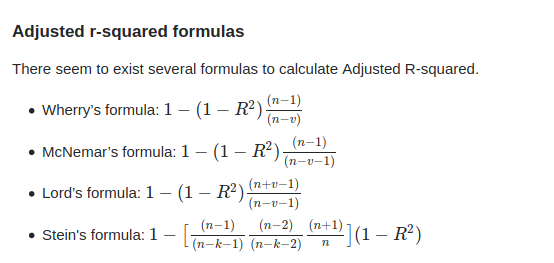

In [323]:
from IPython.display import Image
Image("adjusted_r2.png")

###  **3.) Multicollinearity**

#### Multicollinearity  exists  when  there  is  a  strong  correlation  between  two  or  more  predic-tors  in  a  regression  model .

As collinearity increases there are three problems that arise:


i) Untrustworthy bs:As collinearity increases so do the standard errors of the b coef-ficients. 


ii) It  limits  the  size  of R (correlation_coeffecient)


iii) Importance of predictors: Multicollinearity between predictors makes it difficult to assess the individual importance of a predictor.

#### ***The consequences of multicollinearity depend, to some degree, on the ob­jectives of the analysis. If the goal is prediction, then multicollinearity need not present much of a problem, as  it  primarily affects the calculated importance of the explanatory variables. Even though the interpretation of the regression coefficients associated with the explanatory variables may be suspect, the re­sponse variable may still be able to be accurately predicted. However,   if the goal is explanation (that  is,  the aim is to identify  the strength of relation­ships between individual explanatory variables and the response variable), the presence of a high degree of multicollinearity poses a serious problem for the correct interpretation of the results. When conducting a multiple regression, one has to identify when multicollinearity is likely to present a problem and a strategy to deal with it must be decided upon.***

lets see an example

In [324]:
df = pd.DataFrame({'a':[i for i in range(100)], 'b':[2*i+5 for i in range(100)],'c':[3*i+12 for i in range(100)]})

In [325]:
df.head()

,a,b,c
0,0,5,12
1,1,7,15
2,2,9,18
3,3,11,21
4,4,13,24


In [326]:
# with multicollinearity

model = sm.OLS.from_formula( "c~a+b",data=df)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.837e+31
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:34:22   Log-Likelihood:                 2830.6
No. Observations:                 100   AIC:                            -5657.
Df Residuals:                      98   BIC:                            -5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   4.24e-15   2.36e+14      0.000       1.000       1.000
a             -1.4000   8.56e-15  -1.63e+14      0.000      -1.400      -1.400
b              2.2000   4.09e-15   5.37e+14      0.000       2.200       2.200
==============================================================================
Omnibus:                        6.256   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.195
Skew:                          -0.565   Prob(JB):                       0.0452
Kurtosis:                       2.541   Cond. No.                     4.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [327]:
# without multicollinearity 

model_wo = sm.OLS.from_formula( "c~a",data=df)
res_wo=model_wo.fit()
res_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.162e+32
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:34:23   Log-Likelihood:                 2977.6
No. Observations:                 100   AIC:                            -5951.
Df Residuals:                      98   BIC:                            -5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0000   5.68e-15   2.11e+15      0.000      12.000      12.000
a              3.0000   9.91e-17   3.03e+16      0.000       3.000       3.000
==============================================================================
Omnibus:                        6.184   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.580
Skew:                          -0.503   Prob(JB):                       0.0614
Kurtosis:                       2.430   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **NOTE: if we go on and predict the values , the values will be almost same irrespective of the model we use.**

## **Multiple regression using Python**

In [328]:
df = pd.read_csv('Album2.csv')

In [329]:
df.head()

,adverts,sales,airplay,attract
0,10.256,330,43,10
1,985.685,120,28,7
2,1445.563,360,35,7
3,1188.193,270,33,7
4,574.513,220,44,5


In [330]:
model_1 = sm.OLS.from_formula("sales~adverts", data=df)
res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.94e-19
Time:                        07:34:23   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.000     119.278     149.002
adverts        0.0961      0.010      9.979      0.000       0.077       0.115
==============================================================================
Omnibus:                        4.961   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.556
Skew:                           0.339   Prob(JB):                        0.102
Kurtosis:                       3.294   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
model_2 = sm.OLS.from_formula("sales~adverts+airplay+attract", data=df)
res_2 = model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.88e-46
Time:                        07:34:23   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.127     -60.830       7.604
adverts        0.0849      0.007     12.261      0.000       0.071       0.099
airplay        3.3674      0.278     12.123      0.000       2.820       3.915
attract       11.0863      2.438      4.548      0.000       6.279      15.894
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Standarized regression coeffecients (beta coeffecients)**

#### In statistics, standardized [regression] coefficients, also called beta coefficients or beta weights, are the estimates resulting from a regression analysis that have been standardized so that the variances of dependent and independent variables are 1. Therefore, standardized coefficients refer to how many standard deviations a dependent variable will change, per standard deviation increase in the predictor variable.

In [332]:
df_ = pd.DataFrame()

In [333]:
df_['adverts'] = (df['adverts']-df['adverts'].mean())/df['adverts'].std()
df_['airplay'] = (df['airplay']-df['adverts'].mean())/df['airplay'].std()
df_['attract'] = (df['attract']-df['adverts'].mean())/df['attract'].std()
df_['sales'] = (df['sales']-df['adverts'].mean())/df['sales'].std()


In [334]:
model = sm.OLS.from_formula("sales~adverts+airplay+attract", data=df_)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.88e-46
Time:                        07:34:24   Log-Likelihood:                -174.02
No. Observations:                 200   AIC:                             356.0
Df Residuals:                     196   BIC:                             369.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.7485     18.112      5.673      0.000      67.029     138.468
adverts        0.5108      0.042     12.261      0.000       0.429       0.593
airplay        0.5120      0.042     12.123      0.000       0.429       0.595
attract        0.1917      0.042      4.548      0.000       0.109       0.275
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.351
Skew:                          -0.073   Prob(JB):                        0.839
Kurtosis:                       3.144   Cond. No.                     1.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Comparing models using python**

In [335]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m01 = ols('sales~adverts', data=df).fit()
m02 = ols('sales~adverts+airplay', data=df).fit()
m03 = ols('sales~adverts+airplay+attract', data=df).fit()
anovaResults = anova_lm(m01, m02, m03)
print(anovaResults)

   df_resid            ssr  df_diff        ss_diff           F        Pr(>F)
0     198.0  862264.167468      0.0            NaN         NaN           NaN
1     197.0  480427.878124      1.0  381836.289343  172.214197  1.109942e-28
2     196.0  434574.581730      1.0   45853.296394   20.680561  9.492121e-06


/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [336]:
import statsmodels.stats.outliers_influence as sms

### references
https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence


https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html


https://stackoverflow.com/questions/46304514/access-standardized-residuals-cooks-values-hatvalues-leverage-etc-easily-i


https://www.geeksforgeeks.org/reduce-in-python/

In [337]:
summary_frame = sms.OLSInfluence(m03).summary_frame()
summary_frame .head()

,dfb_Intercept,dfb_adverts,dfb_airplay,dfb_attract,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.315539,-0.242346,0.157739,0.353292,0.058704,2.177404,0.047191,0.484578,2.198596,0.489294
1,0.012593,-0.126374,0.009421,-0.018683,0.010889,-2.323083,0.008007,-0.208705,-2.349724,-0.211098
2,-0.038068,0.174929,0.046574,-0.005385,0.011401,1.468802,0.020700,0.213548,1.473180,0.214184
3,-0.002576,0.012163,0.003444,0.000129,0.000072,0.150116,0.012561,0.016931,0.149741,0.016889
4,-0.008583,0.001088,-0.014254,0.013554,0.000103,-0.123798,0.026065,-0.020253,-0.123487,-0.020202


In [338]:
summary_frame = summary_frame[['cooks_d','standard_resid', 'student_resid', 'hat_diag' ]]
summary_frame.head()

,cooks_d,standard_resid,student_resid,hat_diag
0,0.058704,2.177404,2.198596,0.047191
1,0.010889,-2.323083,-2.349724,0.008007
2,0.011401,1.468802,1.473180,0.020700
3,0.000072,0.150116,0.149741,0.012561
4,0.000103,-0.123798,-0.123487,0.026065


In [339]:
resid = pd.DataFrame(df['sales'] - m03.fittedvalues)
resid.columns = ['residual']
resid.head()

,residual
0,100.079745
1,-108.948992
2,68.442368
3,7.024026
4,-5.752861


In [340]:
dfbeta = pd.DataFrame(pd.DataFrame(sms.OLSInfluence(m03).dfbeta)[0])
dfbeta.columns = ['dfbeta']
dfbeta.head()

,dfbeta
0,-5.421827
1,0.216017
2,-0.658518
3,-0.044809
4,-0.149284


In [341]:
df_ = [df, resid, summary_frame, dfbeta]

In [342]:
from functools import reduce
final_summary = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), df_)

In [343]:
final_summary.head()

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017
2,1445.563,360,35,7,68.442368,0.011401,1.468802,1.473180,0.020700,-0.658518
3,1188.193,270,33,7,7.024026,0.000072,0.150116,0.149741,0.012561,-0.044809
4,574.513,220,44,5,-5.752861,0.000103,-0.123798,-0.123487,0.026065,-0.149284


### **Some Important Terms**


cooks distance :  Cook’s distance is a measure of the overall influence of a case on the model, and Cook and Weisberg (1982) have suggested that values greater than 1 may be cause for concern.


leverage value(hat values) ; A  second  measure  of  influence  is hat  values  (sometimes  called leverage),  which  gauge the influence of the observed value of the outcome variable over the predicted values. The average leverage value is defined as (k+1)/n, in which k is the number of predictors in the model and n is the number of participants

In [344]:
large_resid  = final_summary[(final_summary['standard_resid']>=2) | (final_summary['standard_resid']<=-2)]

In [345]:
large_resid

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017
9,174.093,300,40,7,99.533751,0.017756,2.130289,2.149882,0.015410,-0.215971
46,102.568,40,25,8,-114.969819,0.024115,-2.460996,-2.493538,0.015677,1.137816
51,405.913,190,12,4,97.402661,0.033159,2.099446,2.118034,0.029213,6.069241
54,1542.329,190,33,8,-114.123081,0.040416,-2.455913,-2.488224,0.026104,2.984377
60,579.321,300,30,7,98.810295,0.005948,2.104079,2.122816,0.005346,0.014082
67,56.895,70,37,7,-110.415642,0.022289,-2.363549,-2.391845,0.015709,-0.048133
99,1000.000,250,5,7,97.286661,0.031364,2.095399,2.113858,0.027779,1.051349
163,9.104,120,53,8,-121.324049,0.070766,-2.628814,-2.669584,0.039349,3.072359


####  Let’s  look  now  at  the leverage (hat value), Cook’s distance and covariance ratio for these 12 cases that have large residuals

In [346]:
k = 3 #number of predictors
n = 200 #number of objervations

average_leverage = (k+1)/n
average_leverage

0.02

The  average  leverage  can  be  calculated  as  0.02  (k +  1/n =4/200)  and so we are looking for values either twice as large as this (0.04) or three times as large (0.06)  depending  on  which  statistician  you  trust  most  . All  cases are within the boundary of three times the average and only case 1 is close to two times the average

In [347]:
cov_ratio = pd.DataFrame(sms.OLSInfluence(m03).cov_ratio)
cov_ratio.columns = ['cov_ratio']
cov_ratio.head()

,cov_ratio
0,0.971275
1,0.920183
2,0.997110
3,1.033180
4,1.047660


In [348]:
large_resid = pd.merge(large_resid, cov_ratio, how = 'left', right_index=True, left_index=True)
large_resid

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827,0.971275
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017,0.920183
9,174.093,300,40,7,99.533751,0.017756,2.130289,2.149882,0.015410,-0.215971,0.943920
46,102.568,40,25,8,-114.969819,0.024115,-2.460996,-2.493538,0.015677,1.137816,0.914580
51,405.913,190,12,4,97.402661,0.033159,2.099446,2.118034,0.029213,6.069241,0.959953
54,1542.329,190,33,8,-114.123081,0.040416,-2.455913,-2.488224,0.026104,2.984377,0.924858
60,579.321,300,30,7,98.810295,0.005948,2.104079,2.122816,0.005346,0.014082,0.936538
67,56.895,70,37,7,-110.415642,0.022289,-2.363549,-2.391845,0.015709,-0.048133,0.923698
99,1000.000,250,5,7,97.286661,0.031364,2.095399,2.113858,0.027779,1.051349,0.958877
163,9.104,120,53,8,-121.324049,0.070766,-2.628814,-2.669584,0.039349,3.072359,0.920373


In [349]:
cvr_limit_high = 1+3*average_leverage
cvr_limit_low  = 1-3*average_leverage

(cvr_limit_low, cvr_limit_high)

(0.94, 1.06)

Therefore, we are looking for any cases that deviate substantially from these boundaries. Most of our 12 potential outliers have CVR values within or just outside these boundaries. The only case that causes concern is case 169 (again) whose CVR is some way below the bottom limit. However, given the Cook’s distance for this case, there is probably little cause for alarm.



none of them has a Cook’s distance greater than 1 (even case 169 is well below this criterion), so none of the cases is having an undue influence on  the  model. 

You could have requested other diagnostic statistics and from what you know from the earlier discussion of them you would be well advised to glance over them in case of  any  unusual  cases  in  the  data.  However,  from  this  minimal  set  of  diagnostics  we appear to have a fairly reliable model that has not been unduly influenced by any subset of cases.

### **So, for influental cases**

#### You need to look for cases that might be influencing the regression model:

i) Look at standardized residuals and check that no more than 5% of cases have absolute values above 2, and that no more than about 1% have absolute values above 2.5. Any case with a value above about 3 could be an outlier.


ii)Look at the values of Cook’s distance: any value above 1 indicates a case that might be influencing the model.


iii)Calculate the average leverage (the number of predictors plus 1, divided by the sample size) and then look for values greater than twice or three times this average value.


iv)Calculate the upper and lower limit of acceptable values for the covariance ratio, CVR. The upper limit is 1 plus three times the average leverage, whereas the lower limit is 1 minus three times the average leverage. Cases that have a CVR falling outside these limits may be problematic

## **Testing  the  assumption  of  independent  errors using the Durbin–Watson test**

In [350]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(m03.resid)

1.9498189295800616

The closer to 2 that the value is, the better, and for these data  the value is 1.950, which is so close to 2 that the assumption has almost certainly been met.

## **Assessing the assumption of no multicollinearity using VIF and tolerance**

In [351]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [352]:
df_ = add_constant(df)
df_.head()

,const,adverts,sales,airplay,attract
0,1.0,10.256,330,43,10
1,1.0,985.685,120,28,7
2,1.0,1445.563,360,35,7
3,1.0,1188.193,270,33,7
4,1.0,574.513,220,44,5


In [353]:
df_.drop(['sales'], inplace=True,axis=1)

In [354]:
vif = pd.Series([variance_inflation_factor(df_.values, i) 
               for i in range(1, df_.shape[1])], 
              index=df_.columns[1:])

In [355]:
vif

adverts    1.014593
airplay    1.042504
attract    1.038455
dtype: float64

In [356]:
avg_vif  = np.mean(vif)
avg_vif

1.0318504825952803

In [357]:
tolerance  = 1/vif

In [358]:
tolerance

adverts    0.985617
airplay    0.959229
attract    0.962969
dtype: float64

### Here are a few guidelines from  that can be applied here:

#### i)If the largest VIF is greater than 10 then there is cause for concern (Bowerman & O’Connell, 1990; Myers, 1990) .


#### ii)If the average VIF is substantially greater than 1 then the regression may be biased (Bowerman & O’Connell, 1990) .


#### iii)Tolerance below 0.1 indicates a serious problem.


#### iv)Tolerance below 0.2 indicates a potential problem (Menard, 1995).

#### For our current model the VIF values are all well below 10 and the tolerance statistics all well above 0.2. Also, the average VIF is very close to 1. Based on these measures we can safely conclude that there is no collinearity within our data. 

## **Checking assumptions about the residuals**


### You need to check some of the assumptions of regression to make sure your model generalizes beyond your sample: 


#### i)Look at the graph of the standardized residuals plotted against the fitted (predicted) values. If it looks like a random array of dots then this is good. If the dots seem to get more or less spread out over the graph (look like a funnel) then this is probably a violation of the assumption of homogeneity of variance. If the dots have a pattern to them (i.e., a curved shape) then this is probably a violation of the assumption of linearity. If the dots seem to have a pattern and are more spread out at some points on the plot than others then this probably reflects violations of both homogeneity of variance and linearity. Any of these scenarios puts the validity of your model into question. Repeat the above for all partial plots too.



#### ii)Look at a histogram of the residuals too. If the histogram looks like a normal distribution (and the Q-Q plot looks like a diago-nal line), then all is well. If the histogram looks non-normal, then things are less good. Be warned, though: distributions can look very non-normal in small samples even when they are normal! 

In [359]:
prediction = pd.DataFrame(m03.fittedvalues)
prediction.columns = ['predicted']
prediction.head()

,predicted
0,229.920255
1,228.948992
2,291.557632
3,262.975974
4,225.752861


In [360]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [361]:
final_summary.head()

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017
2,1445.563,360,35,7,68.442368,0.011401,1.468802,1.473180,0.020700,-0.658518
3,1188.193,270,33,7,7.024026,0.000072,0.150116,0.149741,0.012561,-0.044809
4,574.513,220,44,5,-5.752861,0.000103,-0.123798,-0.123487,0.026065,-0.149284


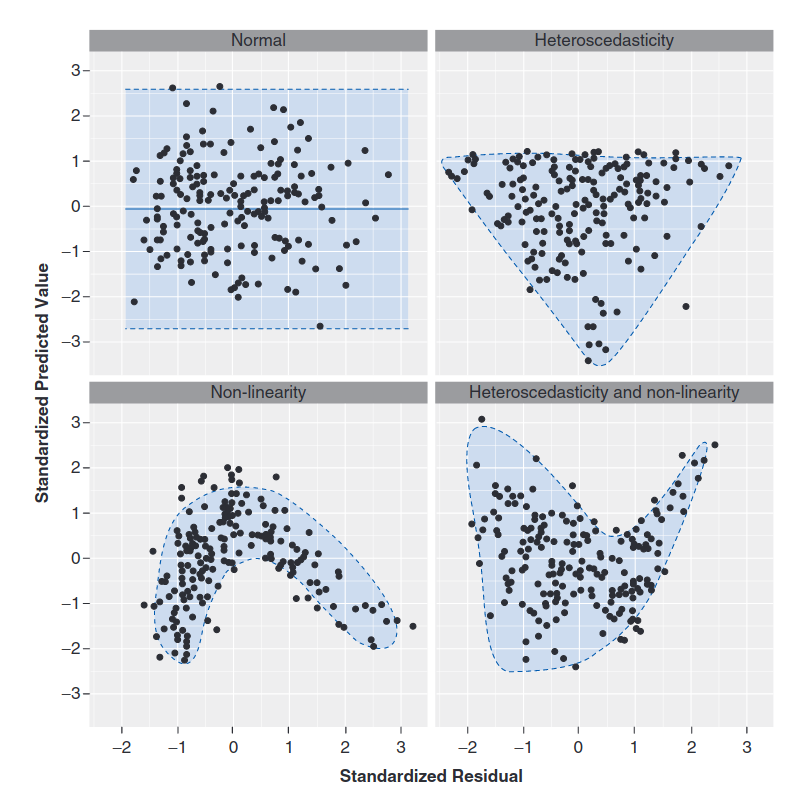

In [362]:
Image("res.png")   # source:  © Andy Field, Jeremy Miles and Zoë Field 2012

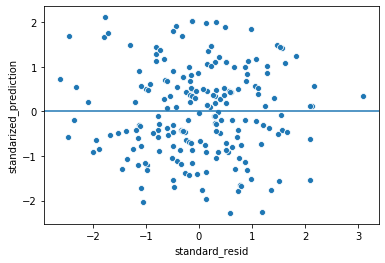

In [363]:
_ = sns.scatterplot(x= final_summary['standard_resid'], y = prediction['standarized_prediction'] )
_ = plt.axhline(y=0)

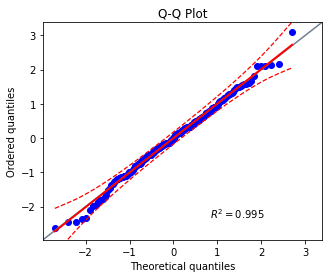

In [364]:
pg.qqplot(final_summary['standard_resid'])

In [365]:
d  =pd.merge(final_summary, prediction , how='inner', left_index=True, right_index=True)

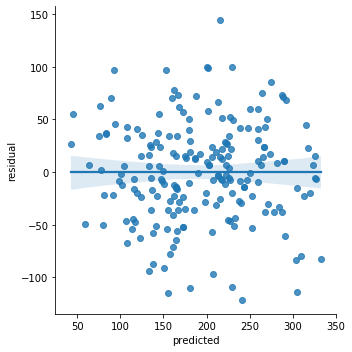

In [366]:
_= sns.lmplot(x ='predicted', y='residual', data=d)

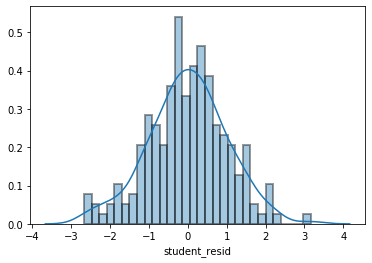

In [367]:
_ = sns.distplot(d['student_resid'],hist_kws=dict(edgecolor="k", linewidth=2), bins=30)

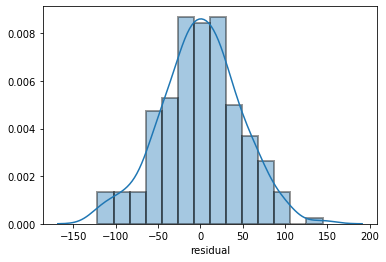

In [368]:
_ = sns.distplot(d['residual'],hist_kws=dict(edgecolor="k", linewidth=2))

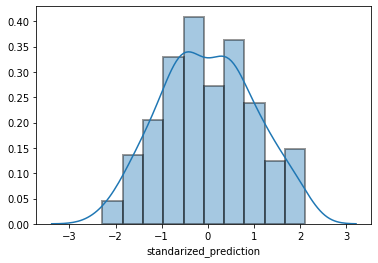

In [369]:
_ = sns.distplot(d['standarized_prediction'],hist_kws=dict(edgecolor="k", linewidth=2))

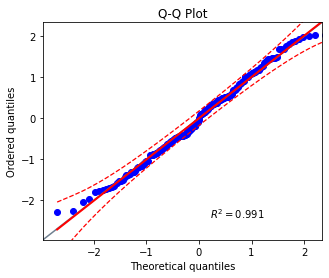

In [370]:
pg.qqplot(d['standarized_prediction'])

## **What if I violate an assumption ?**

### **Robust regression: bootstrapping**

In [371]:
import statsmodels.api as sm

In [372]:
a_ = df_[['const','adverts', 'airplay', 'attract']]
b_ = df[['sales']]

In [373]:
rlm_model = sm.RLM(b_, a_)

In [374]:
rlm_res = rlm_model.fit()

In [375]:
rlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  sales   No. Observations:                  200
Model:                            RLM   Df Residuals:                      196
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 20 Jun 2020                                         
Time:                        07:34:31                                         
No. Iterations:                    10                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.6912     17.386     -1.708      0.088     -63.768       4.385
adverts        0.0857      0.007     12.350      0.000       0.072       0.099
airplay        3.3930      0.278     12.189      0.000       2.847       3.939
attract       11.4426      2.443      4.684      0.000       6.655      16.231
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

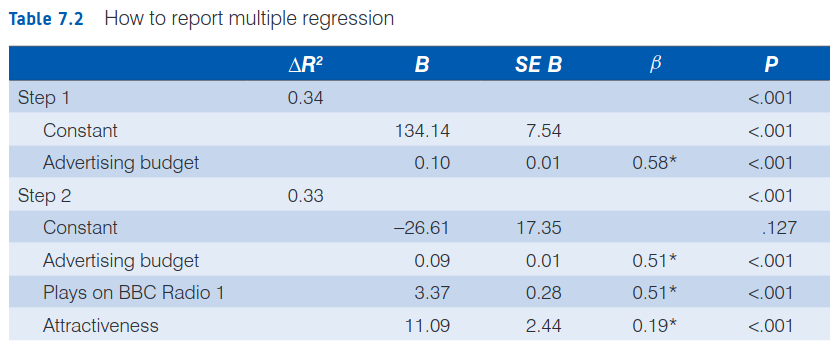

In [376]:
Image("represent.png")    #    © Andy Field, Jeremy Miles and Zoë Field 2012

## **Dummy coding**

In [511]:
da = pd.read_csv('gats_fes.csv')

In [512]:
da.head()

,ticknumb,music,day1,day2,day3,change
0,2111,Metaller,2.65,1.35,1.61,-1.04
1,2229,Crusty,0.97,1.41,0.29,-0.68
2,2338,No Musical Affiliation,0.84,,,
3,2384,Crusty,3.03,,,
4,2401,No Musical Affiliation,0.88,0.08,,


In [513]:
da.replace(' ' ,np.nan, inplace=True)

In [514]:
da['music'].unique()

array(['Metaller', 'Crusty', 'No Musical Affiliation', 'Indie Kid'],
      dtype=object)

In [515]:
da_ = da[da['change'].notna()]

In [516]:
da_

,ticknumb,music,day1,day2,day3,change
0,2111,Metaller,2.65,1.35,1.61,-1.04
1,2229,Crusty,0.97,1.41,0.29,-0.68
9,2504,No Musical Affiliation,1.11,0.44,0.55,-0.56
11,2510,Crusty,0.82,0.2,0.47,-0.35
13,2515,No Musical Affiliation,1.76,1.64,1.58,-0.18
...,...,...,...,...,...,...
777,4582,Indie Kid,1.29,1.58,0.81,-0.48
784,4654,No Musical Affiliation,2.02,1.78,2.55,0.53
787,4666,No Musical Affiliation,1.14,1.35,1.02,-0.12
790,4693,Indie Kid,1.35,0.17,0.44,-0.91


In [517]:
dummies = pd.get_dummies(da_['music'])
dummy = dummies.iloc[:,0:3]
dummy

,Crusty,Indie Kid,Metaller
0,0,0,1
1,1,0,0
9,0,0,0
11,1,0,0
13,0,0,0
...,...,...,...
777,0,1,0
784,0,0,0
787,0,0,0
790,0,1,0


In [518]:
da_ = pd.merge(da_, dummy, how='inner', left_index=True, right_index=True)

In [519]:
da_.head()

,ticknumb,music,day1,day2,day3,change,Crusty,Indie Kid,Metaller
0,2111,Metaller,2.65,1.35,1.61,-1.04,0,0,1
1,2229,Crusty,0.97,1.41,0.29,-0.68,1,0,0
9,2504,No Musical Affiliation,1.11,0.44,0.55,-0.56,0,0,0
11,2510,Crusty,0.82,0.2,0.47,-0.35,1,0,0
13,2515,No Musical Affiliation,1.76,1.64,1.58,-0.18,0,0,0


In [520]:
col =list(da_.columns)

In [521]:
col[-2]='Indie'

In [522]:
da_.columns=col

In [523]:
da_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 800
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticknumb  123 non-null    int64  
 1   music     123 non-null    object 
 2   day1      123 non-null    float64
 3   day2      123 non-null    object 
 4   day3      123 non-null    object 
 5   change    123 non-null    object 
 6   Crusty    123 non-null    uint8  
 7   Indie     123 non-null    uint8  
 8   Metaller  123 non-null    uint8  
dtypes: float64(1), int64(1), object(4), uint8(3)
memory usage: 12.1+ KB


In [524]:
da_['change']=pd.to_numeric(da_['change'])

In [525]:
m04 = ols('change~Crusty+Indie+Metaller', data=da_).fit()

In [526]:
m04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 change   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.270
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0237
Time:                        07:48:54   Log-Likelihood:                -126.53
No. Observations:                 123   AIC:                             261.1
Df Residuals:                     119   BIC:                             272.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5543      0.090     -6.134      0.000      -0.733      -0.375
Crusty        -0.4115      0.167     -2.464      0.015      -0.742      -0.081
Indie         -0.4100      0.205     -2.001      0.048      -0.816      -0.004
Metaller       0.0284      0.160      0.177      0.860      -0.289       0.346
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.881
Skew:                          -0.197   Prob(JB):                        0.644
Kurtosis:                       2.871   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
summary_ = sms.OLSInfluence(m04).summary_frame()
summary_ .head()

,dfb_Intercept,dfb_Crusty,dfb_Indie,dfb_Metaller,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-4.905781e-15,-3.317546e-16,1.352029e-15,-1.231013e-01,5.571876e-03,-0.761233,0.037037,-0.149290,-0.759880,-0.149025
1,2.448764e-15,7.414646e-02,-2.429558e-15,-2.415224e-15,1.956655e-03,0.424279,0.041667,0.088468,0.422812,0.088162
9,-1.099991e-03,5.950972e-04,4.850505e-04,6.199571e-04,3.050585e-07,-0.008340,0.017241,-0.001105,-0.008305,-0.001100
11,-2.455548e-15,1.601925e-01,-4.601878e-15,-1.124460e-15,9.082698e-03,0.914116,0.041667,0.190606,0.913480,0.190474
13,7.245777e-02,-3.919978e-02,-3.195087e-02,-4.083733e-02,1.320307e-03,0.548662,0.017241,0.072672,0.547044,0.072458


In [529]:
summary_ = summary_[['cooks_d','standard_resid', 'student_resid', 'hat_diag' ]]
summary_.reset_index(inplace=True, drop=True)
summary_.head()

,cooks_d,standard_resid,student_resid,hat_diag
0,5.571876e-03,-0.761233,-0.759880,0.037037
1,1.956655e-03,0.424279,0.422812,0.041667
2,3.050585e-07,-0.008340,-0.008305,0.017241
3,9.082698e-03,0.914116,0.913480,0.041667
4,1.320307e-03,0.548662,0.547044,0.017241


In [532]:
da_.reset_index(inplace=True, drop=True)

In [533]:
resid = pd.DataFrame(da_['change'] - m04.fittedvalues)
resid.columns = ['residual']
resid.reset_index(inplace=True, drop=True)
resid.head()

,residual
0,-0.514074
1,0.285833
2,NaN
3,NaN
4,NaN


In [534]:
dfbeta = pd.DataFrame(pd.DataFrame(sms.OLSInfluence(m04).dfbeta)[0])
dfbeta.columns = ['dfbeta']
dfbeta.head()

,dfbeta
0,-4.440892e-16
1,2.220446e-16
2,-9.981851e-05
3,-2.220446e-16
4,6.566848e-03


In [535]:
dq = [da_, resid, summary_, dfbeta]

In [536]:
final_summary = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), dq)
final_summary

,ticknumb,music,day1,day2,day3,change,Crusty,Indie,Metaller,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,2111,Metaller,2.65,1.35,1.61,-1.04,0,0,1,-0.514074,5.571876e-03,-0.761233,-0.759880,0.037037,-4.440892e-16
1,2229,Crusty,0.97,1.41,0.29,-0.68,1,0,0,0.285833,1.956655e-03,0.424279,0.422812,0.041667,2.220446e-16
2,2504,No Musical Affiliation,1.11,0.44,0.55,-0.56,0,0,0,NaN,3.050585e-07,-0.008340,-0.008305,0.017241,-9.981851e-05
3,2510,Crusty,0.82,0.2,0.47,-0.35,1,0,0,NaN,9.082698e-03,0.914116,0.913480,0.041667,-2.220446e-16
4,2515,No Musical Affiliation,1.76,1.64,1.58,-0.18,0,0,0,NaN,1.320307e-03,0.548662,0.547044,0.017241,6.566848e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4582,Indie Kid,1.29,1.58,0.81,-0.48,0,1,0,NaN,1.025599e-02,0.730282,0.728842,0.071429,2.220446e-16
119,4654,No Musical Affiliation,2.02,1.78,2.55,0.53,0,0,0,NaN,1.107946e-02,1.589376,1.599755,0.017241,1.902299e-02
120,4666,No Musical Affiliation,1.14,1.35,1.02,-0.12,0,0,0,NaN,1.777508e-03,0.636610,0.635011,0.017241,7.619480e-03
121,4693,Indie Kid,1.35,0.17,0.44,-0.91,0,1,0,NaN,1.288681e-04,0.081860,0.081518,0.071429,1.110223e-16


In [537]:
large_resid  = final_summary[(final_summary['standard_resid']>=2) | (final_summary['standard_resid']<=-2)]

In [539]:
large_resid 

,ticknumb,music,day1,day2,day3,change,Crusty,Indie,Metaller,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
7,2604,Crusty,2.57,0.11,0.02,-2.55,1,0,0,NaN,0.060102,-2.351468,-2.397940,0.041667,2.220446e-16
21,2975,No Musical Affiliation,1.66,2.12,2.7,1.04,0,0,0,NaN,0.023953,2.336931,2.382401,0.017241,2.797036e-02
26,3095,No Musical Affiliation,2.71,0.78,0.33,-2.38,0,0,0,NaN,0.031410,-2.676086,-2.748813,0.017241,-3.202964e-02
46,3490,No Musical Affiliation,2.55,0.82,0.29,-2.26,0,0,0,NaN,0.027416,-2.500190,-2.557747,0.017241,-2.992438e-02
69,3792,No Musical Affiliation,1.32,1.7,2.29,0.97,0,0,0,NaN,0.021896,2.234325,2.273109,0.017241,2.674229e-02


In [540]:
k = 3 #number of predictors
n = 123 #number of objervations

average_leverage = (k+1)/n
average_leverage

0.032520325203252036

In [541]:
cvr_limit_high = 1+3*average_leverage
cvr_limit_low  = 1-3*average_leverage

(cvr_limit_low, cvr_limit_high)

(0.9024390243902439, 1.0975609756097562)

In [542]:
cov_ratio = pd.DataFrame(sms.OLSInfluence(m04).cov_ratio)
cov_ratio.columns = ['cov_ratio']
cov_ratio.head()

,cov_ratio
0,1.053344
1,1.072787
2,1.052475
3,1.049305
4,1.041869


In [544]:
print(cov_ratio.iloc[7])
print(cov_ratio.iloc[21])
print(cov_ratio.iloc[26])
print(cov_ratio.iloc[46])
print(cov_ratio.iloc[69])

cov_ratio    0.892255
Name: 7, dtype: float64
cov_ratio    0.872171
Name: 21, dtype: float64
cov_ratio    0.821091
Name: 26, dtype: float64
cov_ratio    0.848158
Name: 46, dtype: float64
cov_ratio    0.886672
Name: 69, dtype: float64


#### Therefore, we are looking for any cases that deviate substantially from these boundaries.. However, given the Cook’s distance for this case, there is probably little cause for alarm.



#### none of them has a Cook’s distance greater than 1, so none of the cases is having an undue influence on  the  model. 

In [545]:
durbin_watson(m04.resid)

1.893407120567447

In [546]:
da_ = add_constant(da_)

In [547]:
dz = da_[['const', 'Crusty', 'Indie', 'Metaller']]

In [548]:
dz.reset_index(drop=True, inplace=True)
dz

,const,Crusty,Indie,Metaller
0,1.0,0,0,1
1,1.0,1,0,0
2,1.0,0,0,0
3,1.0,1,0,0
4,1.0,0,0,0
...,...,...,...,...
118,1.0,0,1,0
119,1.0,0,0,0
120,1.0,0,0,0
121,1.0,0,1,0


In [549]:
vif = pd.Series([variance_inflation_factor(dz.values, i) 
               for i in range(1, dz.shape[1])], 
              index=dz.columns[1:])

In [550]:
vif

Crusty      1.137931
Indie       1.100084
Metaller    1.143818
dtype: float64

In [551]:
avg_vif  = np.mean(vif)
avg_vif

1.1272778245023831

In [552]:
tolerance  = 1/vif
tolerance 

Crusty      0.878788
Indie       0.909021
Metaller    0.874265
dtype: float64

In [559]:
prediction = pd.DataFrame(m04.fittedvalues)
prediction.columns = ['predicted']
prediction.reset_index(drop=True, inplace=True)
prediction.head()

,predicted
0,-0.525926
1,-0.965833
2,-0.554310
3,-0.965833
4,-0.554310


In [560]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

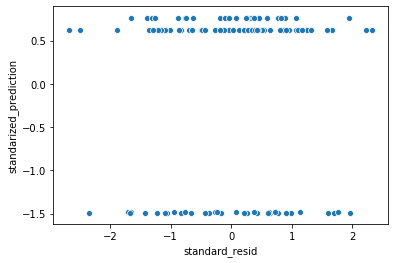

In [561]:
_ = sns.scatterplot(x= final_summary['standard_resid'], y = prediction['standarized_prediction'] )

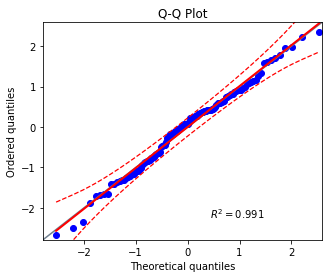

In [564]:
_ = pg.qqplot(final_summary['standard_resid'],)

### All in all, the model looks fairly reliable and generalizable!